# **利用深度學習處理更複雜的資料集**

## **匯入所需的函式庫**

In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

from tqdm import tqdm_notebook
import matplotlib.pyplot as plt

## **準備資料**

In [2]:
pkgo = pd.read_csv('./Data/pkgo_nyc_class5.csv')

![title](./Slides_image/pkgo_description.png)

In [3]:
pkgo.head(10)

,latitude,longitude,local.month,local.day,local.hour,local.minute,local.second,appearedTimeOfDay,appearedHour,appearedMinute,...,cooc_143,cooc_144,cooc_145,cooc_146,cooc_147,cooc_148,cooc_149,cooc_150,cooc_151,class
0,0.004751,-0.617821,9,8,2,51,33,4,4,51,...,0,0,0,0,0,0,0,0,0,1
1,0.073257,-0.703223,9,8,2,50,45,4,4,50,...,0,0,0,0,0,0,0,0,0,0
2,0.001167,-0.612492,9,8,2,37,31,4,4,37,...,0,0,0,0,0,0,0,0,0,1
3,0.208499,-0.532359,9,8,2,34,37,4,4,34,...,0,0,0,0,0,0,0,0,0,1
4,-0.297792,-0.640407,9,8,2,34,6,4,4,34,...,0,0,0,0,0,0,0,0,0,4
5,-0.297866,-0.640410,9,8,2,28,17,4,4,28,...,0,0,0,0,0,0,0,0,0,3
6,-0.297744,-0.640399,9,8,2,23,7,4,4,23,...,0,0,0,0,0,0,0,0,0,4
7,-0.297871,-0.640412,9,8,2,21,1,4,4,21,...,0,0,0,0,0,0,0,0,0,3
8,0.208481,-0.532345,9,8,2,20,13,4,4,20,...,0,0,0,0,0,0,0,0,0,1
9,-0.297743,-0.640400,9,8,2,17,38,4,4,17,...,0,0,0,0,0,0,0,0,0,4


In [4]:
X_ = pkgo.iloc[:, :-1]
X = X_.values  # 將 dataframe 轉換成 ndarray 的資料型態

In [5]:
y = pkgo['class']
y.values[0:10]

array([1, 0, 1, 1, 4, 3, 4, 3, 1, 4])

In [6]:
# 做 One-hot encoding
y = keras.utils.to_categorical(y)
y[0:10]

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

## **建構模型**

In [7]:
def build_model(X):
    model = keras.Sequential()

    model.add(layers.Dense(128, input_dim=X.shape[1]))
    model.add(layers.Activation('sigmoid'))

    model.add(layers.Dense(256))
    model.add(layers.Activation('sigmoid'))

    model.add(layers.Dense(5))
    model.add(layers.Activation('softmax'))

    return model

In [8]:
model = build_model(X)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               25728     
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 1285      
_________________________________________________________________
activation_2 (Activation)    (None, 5)                 0         
Total params: 60,037
Trainable params: 60,037
Non-trainable params: 0
____________________________________________________

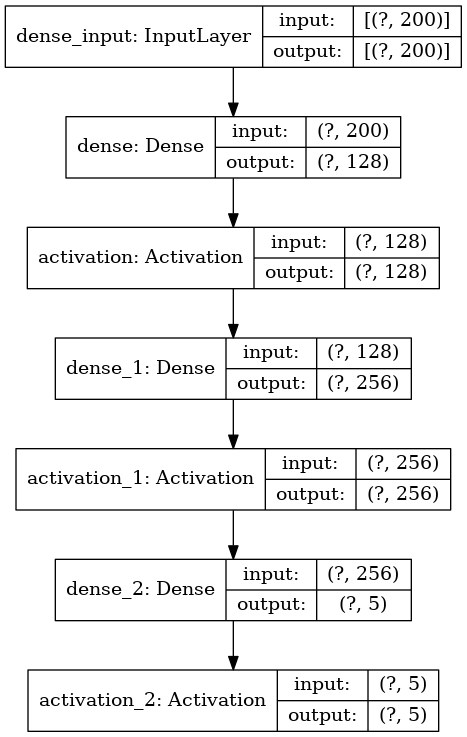

In [9]:
plot_model(model, to_file='./Data/pkgo_model.png', show_shapes=True)

## **編譯模型**

In [10]:
# 編譯模型用以訓練 (設定 optimizer, loss function, metrics, 等等)
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(learning_rate=0.01),
              metrics=['acc'])

## **訓練模型**

In [11]:
# 設定訓練參數
batch_size = 16
epochs = 50

In [12]:
# 訓練模型
model_history \
    = model.fit(X, y,
                batch_size=batch_size,
                epochs=epochs,
                verbose=1,
                shuffle=True,
                validation_split=0.1)

Train on 1652 samples, validate on 184 samples
Epoch 1/50
1652/1652 [==============================] - 1s 481us/sample - loss: 1.4011 - acc: 0.4843 - val_loss: 1.3063 - val_acc: 0.6196
Epoch 2/50
1652/1652 [==============================] - 0s 110us/sample - loss: 1.3658 - acc: 0.5048 - val_loss: 1.2546 - val_acc: 0.6196
Epoch 3/50
1652/1652 [==============================] - 0s 109us/sample - loss: 1.3570 - acc: 0.5048 - val_loss: 1.3128 - val_acc: 0.6196
Epoch 4/50
1652/1652 [==============================] - 0s 110us/sample - loss: 1.3553 - acc: 0.5048 - val_loss: 1.2225 - val_acc: 0.6196
Epoch 5/50
1652/1652 [==============================] - 0s 111us/sample - loss: 1.3486 - acc: 0.5048 - val_loss: 1.2824 - val_acc: 0.6196
Epoch 6/50
1652/1652 [==============================] - 0s 111us/sample - loss: 1.3418 - acc: 0.5048 - val_loss: 1.2470 - val_acc: 0.6196
Epoch 7/50
1652/1652 [==============================] - 0s 113us/sample - loss: 1.3357 - acc: 0.5048 - val_loss: 1.1909 - val

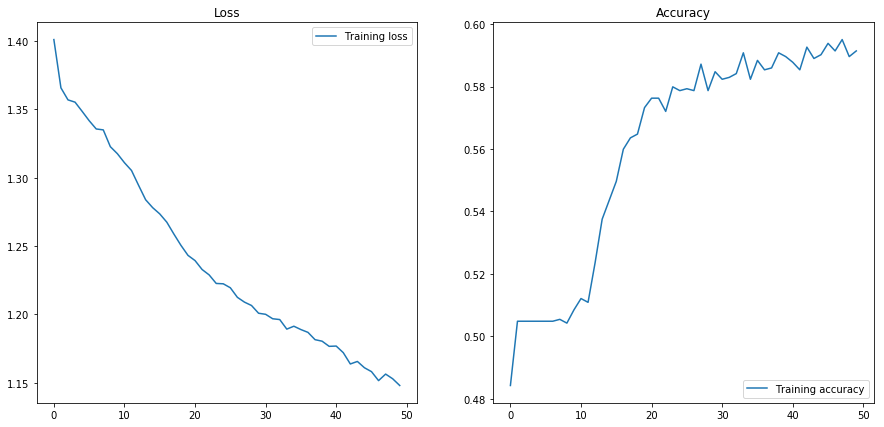

In [13]:
# 視覺化訓練過程
loss = model_history.history['loss']
acc = model_history.history['acc']

plt.figure(figsize=(15, 7))

# 繪製 Training loss
plt.subplot(121)
plt.plot(range(len(loss)), loss, label='Training loss')
plt.title('Loss')
plt.legend(loc='upper right')

# 繪製 Training accuracy
plt.subplot(122)
plt.plot(range(len(acc)), acc, label='Training accuracy')
plt.title('Accuracy')
plt.legend(loc='lower right')

plt.show()

![title](./Slides_image/Tips_for_training.png)

# **調整模型 — 訓練結果不佳時**

![titile](./Slides_image/Bad_result_on_train.png)

## **可以試著調整**
* ## [**Loss Function**](#訓練技巧-—-Loss-function)
* ## [**Learning Rate**](#訓練技巧-—-Learning-rate)
* ## [**Activation Function**](#訓練技巧-—-Activation-function)
* ## [**Optimizers**](#訓練技巧-—-Optimizers)

* ## **訓練技巧 — Loss function**

![title](./Slides_image/regression_loss.png)

![title](./Slides_image/categorical_classification_loss.png)

![title](./Slides_image/binary_classification_loss.png)

In [14]:
# 以下放置要比較的 loss function
loss_funcs = ['mean_squared_error',
              'categorical_crossentropy',
              'mean_absolute_error']

batch_size = 16
epochs = 50

# 建立兩個 list 記錄選用不同 loss function 的訓練結果
all_loss, all_acc = [], []

# 迭代不同的 loss function 去訓練模型
for loss_func in loss_funcs:
    print("Running model, loss = %s" % loss_func)

    # 確保每次都是訓練新的模型，而不是接續上一輪的模型
    model = build_model(X)
    model.compile(loss=loss_func,
                  optimizer=keras.optimizers.SGD(learning_rate=0.01),
                  metrics=['acc'])

    # 確保每次都設定一樣的參數
    history = model.fit(X, y,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=0,
                        shuffle=True,
                        validation_split=0.1)

    # 將訓練過程記錄下來
    all_loss.append(history.history['loss'])
    all_acc.append(history.history['acc'])
print('----------------- training done! -----------------')

Running model, loss = mean_squared_error
Running model, loss = categorical_crossentropy
Running model, loss = mean_absolute_error
----------------- training done! -----------------


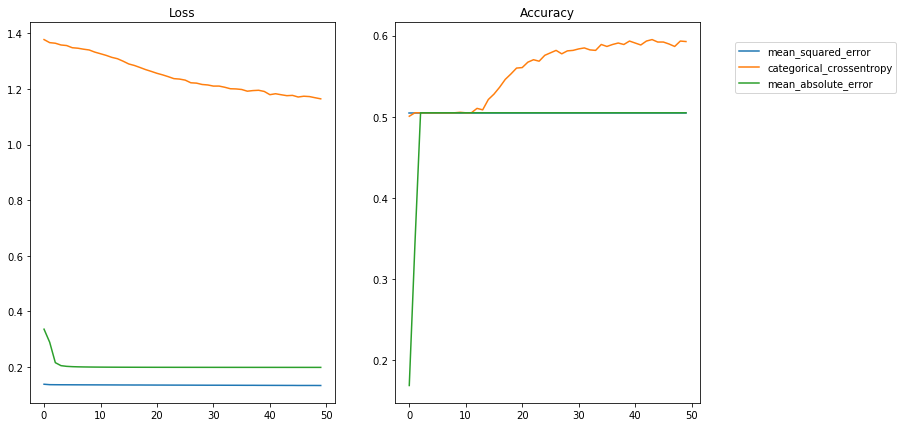

In [15]:
# 視覺化訓練過程
plt.figure(figsize=(12, 7))

# 繪製 Training loss
plt.subplot(121)
for k in range(len(loss_funcs)):
    plt.plot(range(len(all_loss[k])), all_loss[k], label=loss_funcs[k])
plt.title('Loss')

# 繪製 Training accuracy
plt.subplot(122)
for k in range(len(loss_funcs)):
    plt.plot(range(len(all_acc[k])), all_acc[k], label=loss_funcs[k])
plt.title('Accuracy')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.)

plt.show()

## ![title](./Slides_image/classification_loss_2.png)

![title](./Slides_image/loss_selection.png)

[(Back to Training Tips)](#調整模型-—-訓練結果不佳時)

* ## **訓練技巧 — Learning rate**

In [16]:
# 以下放置要比較的 learning rate
lr_list = [0.1, 0.01, 0.001, 0.0001]

batch_size = 16
epochs = 50

# 建立兩個 list 記錄選用不同 learning rate 的訓練結果
all_loss, all_acc = [], []

# 迭代不同的 learning rate 去訓練模型
for lr in lr_list:
    print("Running model, learning rate = {}".format(lr))

    # 確保每次都是訓練新的模型，而不是接續上一輪的模型
    model = build_model(X)
    model.compile(loss='categorical_crossentropy',
                  optimizer=keras.optimizers.SGD(learning_rate=lr),
                  metrics=['acc'])

    # 確保每次都設定一樣的參數
    history = model.fit(X, y,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=0,
                        shuffle=True,
                        validation_split=0.1)

    # 將訓練過程記錄下來
    all_loss.append(history.history['loss'])
    all_acc.append(history.history['acc'])
print('----------------- training done! -----------------')

Running model, learning rate = 0.1
Running model, learning rate = 0.01
Running model, learning rate = 0.001
Running model, learning rate = 0.0001
----------------- training done! -----------------


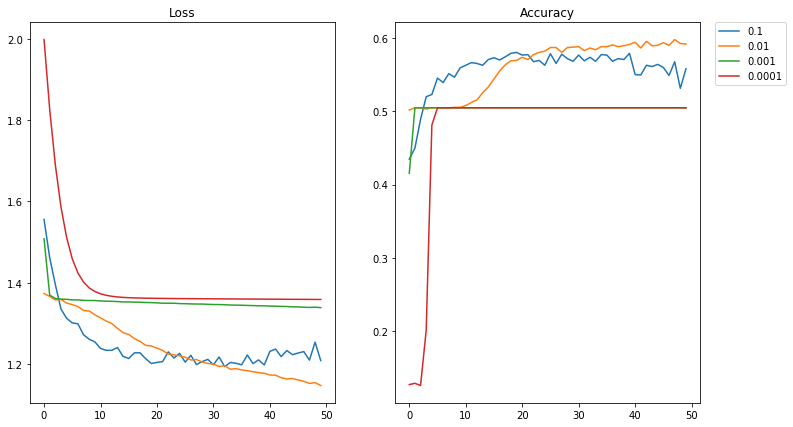

In [17]:
# 視覺化訓練過程
plt.figure(figsize=(12, 7))

# 繪製 Training loss
plt.subplot(121)
for k in range(len(lr_list)):
    plt.plot(range(len(all_loss[k])), all_loss[k], label=lr_list[k])
plt.title('Loss')

# 繪製 Training accuracy
plt.subplot(122)
for k in range(len(lr_list)):
    plt.plot(range(len(all_acc[k])), all_acc[k], label=lr_list[k])
plt.title('Accuracy')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

![title](./Slides_image/model_tuning_lr.png)

[(Back to Training Tips)](#調整模型-—-訓練結果不佳時)

* ## **訓練技巧 — Activation function**

![title](./Slides_image/sigmoid_tanh_softsign.png)

![title](./Slides_image/sigmoid_tanh_softsign_diff.png)

![title](./Slides_image/relu_softplus.png)

![title](./Slides_image/relu_softplus_diff.png)

![title](./Slides_image/leaky_relu.png)

![title](./Slides_image/activation.png)

In [18]:
def build_model_acti(X, acti):  # 重新建構一個可以更改 Activation 的模型
    # LeakyReLU 的設置方法與其他 activation function不同
    if acti == 'leaky-relu':
        lrelu = layers.LeakyReLU(alpha=0.02)

    model = keras.Sequential()
    model.add(layers.Dense(128, input_dim=X.shape[-1]))

    # 設置要選用的 activation function
    if acti == 'leaky-relu':
        model.add(lrelu)
    else:
        model.add(layers.Activation(acti))

    model.add(layers.Dense(256))

    # 設置要選用的 activation function
    if acti == 'leaky-relu':
        model.add(lrelu)
    else:
        model.add(layers.Activation(acti))

    model.add(layers.Dense(5))
    model.add(layers.Activation('softmax'))
    return model

In [19]:
# 以下放置要比較的 activation function
acti_list = ['sigmoid', 'relu', 'leaky-relu', 'tanh', 'softsign']

batch_size = 16
epochs = 30

# 建立兩個 list 記錄選用不同 activation function 的訓練結果
all_loss, all_acc = [], []

# 迭代不同的 activation function 去訓練模型
for acti in acti_list:
    print("Running model, activation function = {}".format(acti))

    # 確保每次都是訓練新的模型，而不是接續上一輪的模型
    model = build_model_acti(X, acti)
    model.compile(loss='categorical_crossentropy',
                  optimizer=keras.optimizers.SGD(learning_rate=0.01),
                  metrics=['acc'])

    # 確保每次都設定一樣的參數
    history = model.fit(X, y,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=0,
                        shuffle=True,
                        validation_split=0.1)

    # 將訓練過程記錄下來
    all_loss.append(history.history['loss'])
    all_acc.append(history.history['acc'])
print('----------------- training done! -----------------')

Running model, activation function = sigmoid
Running model, activation function = relu
Running model, activation function = leaky-relu
Running model, activation function = tanh
Running model, activation function = softsign
----------------- training done! -----------------


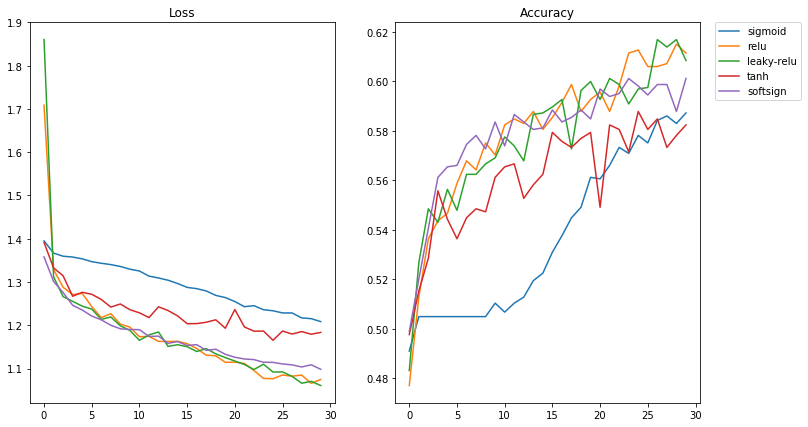

In [20]:
# 視覺化訓練過程
plt.figure(figsize=(12, 7))

# 繪製 Training loss
plt.subplot(121)
for k in range(len(acti_list)):
    plt.plot(range(len(all_loss[k])), all_loss[k], label=acti_list[k])
plt.title('Loss')

# 繪製 Training accuracy
plt.subplot(122)
for k in range(len(acti_list)):
    plt.plot(range(len(all_acc[k])), all_acc[k], label=acti_list[k])
plt.title('Accuracy')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

![title](./Slides_image/activation_selection.png)

[(Back to Training Tips)](#調整模型-—-訓練結果不佳時)

* ## **訓練技巧 — Optimizers**

![title](./Slides_image/SGD.png)

![title](./Slides_image/Momentum.png)

![title](./Slides_image/learning_rate_decay.png)

![title](./Slides_image/Adagrad.png)

![title](./Slides_image/RMSprop.png)

![title](./Slides_image/Adam.png)

In [22]:
# 以下放置要比較的 optimizer
optim_list = ['SGD', 'Adagrad', 'RMSprop', 'Adam']

batch_size = 16
epochs = 50

# 建立兩個 list 記錄選用不同 optimizer 的訓練結果
all_loss, all_acc = [], []

# 迭代不同的 optimizer 去訓練模型
for optim in optim_list:
    print("Running model, optimizer = {}".format(optim))

    # 確保每次都是訓練新的模型，而不是接續上一輪的模型
    model = build_model_acti(X, 'relu')
    if optim == "SGD":
        optim = keras.optimizers.SGD(lr=0.01)
    elif optim == "Adagrad":
        optim = keras.optimizers.Adagrad(lr=0.001)
    elif optim == "RMSprop":
        optim = keras.optimizers.RMSprop(lr=0.001)
    elif optim == "Adam":
        optim = keras.optimizers.Adam(lr=0.001)

    model.compile(loss='categorical_crossentropy',
                  optimizer=optim,
                  metrics=['acc'])

    # 確保每次都設定一樣的參數
    history = model.fit(X, y,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=0,
                        shuffle=True,
                        validation_split=0.1)

    # 將訓練結果記錄下來
    all_loss.append(history.history['loss'])
    all_acc.append(history.history['acc'])
print('----------------- training done! -----------------')

Running model, optimizer = SGD
Running model, optimizer = Adagrad
Running model, optimizer = RMSprop
Running model, optimizer = Adam
----------------- training done! -----------------


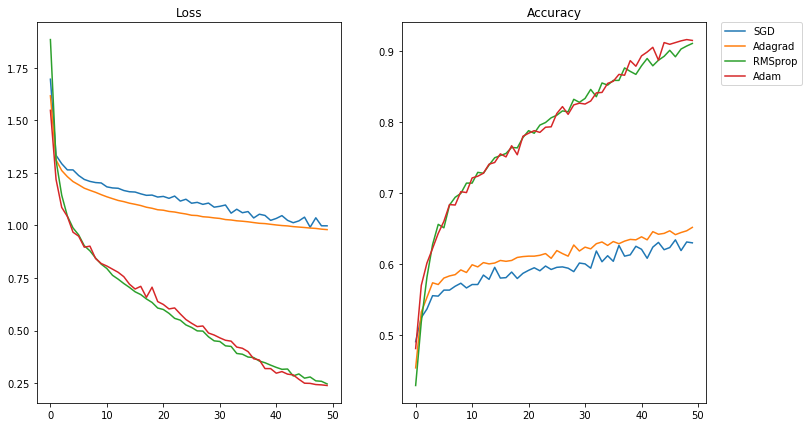

In [23]:
# 視覺化訓練過程
plt.figure(figsize=(12, 7))

# 繪製 Training loss
plt.subplot(121)
for k in range(len(optim_list)):
    plt.plot(range(len(all_loss[k])), all_loss[k], label=optim_list[k])
plt.title('Loss')

# 繪製 Training accuracy
plt.subplot(122)
for k in range(len(optim_list)):
    plt.plot(range(len(all_acc[k])), all_acc[k], label=optim_list[k])
plt.title('Accuracy')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

[(Back to Training Tips)](#調整模型-—-訓練結果不佳時)